# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Matteucci Massimiliano 932234 </span>
## <span style="color:green"> Esercitazione8 </span>
### <span style="color:green"> Esercizio1 </span>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os 

In [16]:
Herr = np.loadtxt("Esercizio8.1//Dati.dat", usecols=(3), delimiter=' ', unpack='true')
H=np.loadtxt("Esercizio8.1//Dati.dat", usecols=(2), delimiter=' ', unpack='true')

N=H.size
x=np.arange(N)

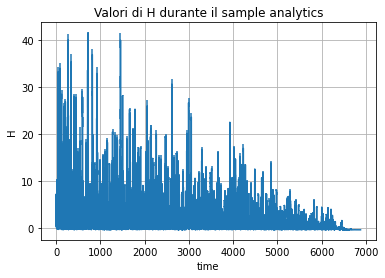

In [17]:
plt.errorbar(x,H,Herr)
plt.title('Valori di H durante il sample analytics')
plt.xlabel('time')
plt.ylabel('H')
plt.grid(True)

Per trovare la $\mu$ e la $\sigma$ che minimizzano H si è utilizzato il sample analytics muovendo le due variabili con probabilità uniformi.

### <span style="color:green"> Esercizio2 </span>

In [68]:
y = np.loadtxt("Esercizio8.2//Dati.dat", usecols=(1), delimiter=' ', unpack='true')
y_err = np.loadtxt("Esercizio8.2//Dati.dat", usecols=(2), delimiter=' ', unpack='true')

N=y.size
x=np.arange(N)

xPsi = np.loadtxt("Esercizio8.2//Psi", usecols=(0), delimiter=' ', unpack='true')
Psi = np.loadtxt("Esercizio8.2//Psi", usecols=(1), delimiter=' ', unpack='true')/50000.

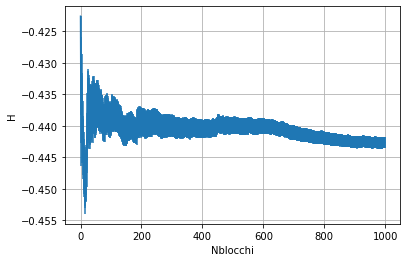

H finale  -0.442652


In [70]:
plt.errorbar(x,y,y_err)
plt.xlabel('Nblocchi')
plt.ylabel('H')
plt.grid(True)
plt.show()

print('H finale ',y[-1])

In [41]:
M_E=2.71828182846
def Psi2( x, mean,sigma):
   return ((M_E**(-(x-mean)**2/(2.*sigma**2))+M_E**(-(x+mean)**2/(2.*sigma**2)))**2)

def Vpot(x):
    return (x**2 - 2.5)*x**2


In [42]:
#Solution obtained by transforming the Schrodinger equation into a matrix equation
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


# Plot a few things

In [56]:
x2=np.linspace(-3,3,100)
y=Psi2(x2,0.80996,0.624198)

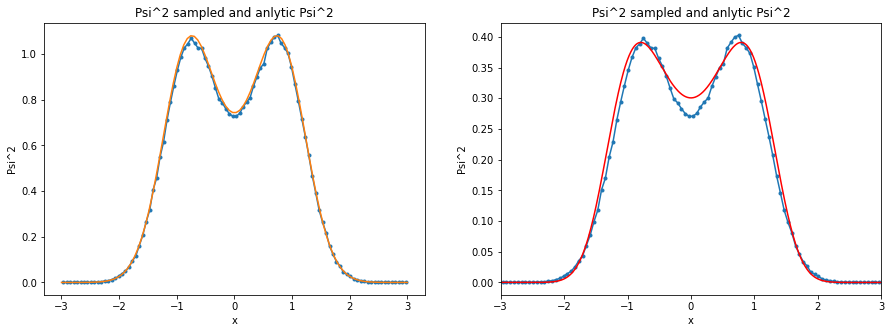

In [67]:
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Psi^2 sampled and anlytic Psi^2')
plt.xlabel('x')
plt.ylabel('Psi^2')
plt.plot(xPsi,2.15*Psi,marker=".")
plt.plot(x2,y)

plt.subplot(1,2,2)
plt.title('Psi^2 sampled and anlytic Psi^2')
plt.xlabel('x')
plt.ylabel('Psi^2')
plt.plot(xPsi,0.4*Psi/0.5,marker=".")
plt.plot(x,(psi[0])**2,color='red')
plt.xlim((-3,3))

plt.show()

print("Ground state energy: ", E[0])

Riscalando in modo appropriato i punti della $|\Psi_T(x)|^2$ campionata si vede che corrisponde a quella analitica mentre differisce per la parte centrale dalla $|\Psi_T(x)|^2$ ottenuta con il metodo della matrice che presenta anche una energia minore come ci si aspetta dal ground state.